Census Income Project

Problem Statement:


This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

Description of fnlwgt (final weight)

The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

1. A single cell estimate of the population 16+ for each state.

2. Controls for Hispanic Origin by age and sex.

3. Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.



In [2]:
#importing libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
#loading data set
df=pd.read_csv('census_income.csv')

In [4]:
#checking dataset
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [5]:
#checking the datatype of each column 
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
#checking shape
df.shape

(32560, 15)

In [8]:
#checking null values 
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

<AxesSubplot:>

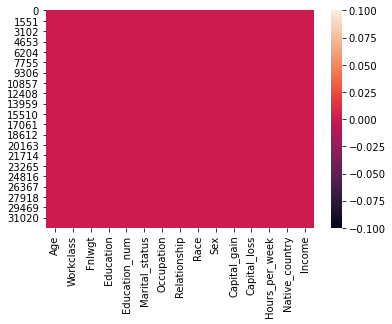

In [9]:
#checking null values using heatmap
sns.heatmap(df.isnull())

as we can see no null values are present 

In [11]:
df['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

In [13]:
# Checking the unique values of Attributes
print('age',df.Age.unique())
print('workclass',df.Workclass.unique())
print('education',df.Education.unique())
print('Marital_status',df['Marital_status'].unique())
print('occupation',df.Occupation.unique())
print('relationship',df.Relationship.unique())
print('race',df.Race.unique())
print('sex',df.Sex.unique())
print('native_country',df['Native_country'].unique())
print('income',df.Income.unique())

age [50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 39 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
workclass [' Self-emp-not-inc' ' Private' ' State-gov' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
education [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
Marital_status [' Married-civ-spouse' ' Divorced' ' Married-spouse-absent'
 ' Never-married' ' Separated' ' Married-AF-spouse' ' Widowed']
occupation [' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Adm-clerical' ' Sales' ' Craft-repair'
 ' Transport-moving' ' Farming-fishing' ' Machine-op-inspct'
 ' Tech-support' ' ?' ' Protective-serv' ' Armed-Forces'
 ' Priv-house-serv']
relationship [' Husband' ' Not-

We can see that workclass, occupation and country has a special character value '?'

will have to remove that

In [14]:
# Replacing special character to NaN
df['Native_country'] = df['Native_country'].replace(' ?',np.nan)
df['Workclass'] = df['Workclass'].replace(' ?',np.nan)
df['Occupation'] = df['Occupation'].replace(' ?',np.nan)

In [15]:
df.tail()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [19]:
#dropping the nan values 
df.dropna(how='any',inplace=True)

In [21]:
df.shape

(30161, 15)

In [22]:
#Finding if special characters are present in the data 
df.isin([' ?']).sum(axis=0)

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

# EDA

Text(0.5, 1.0, 'workclass')

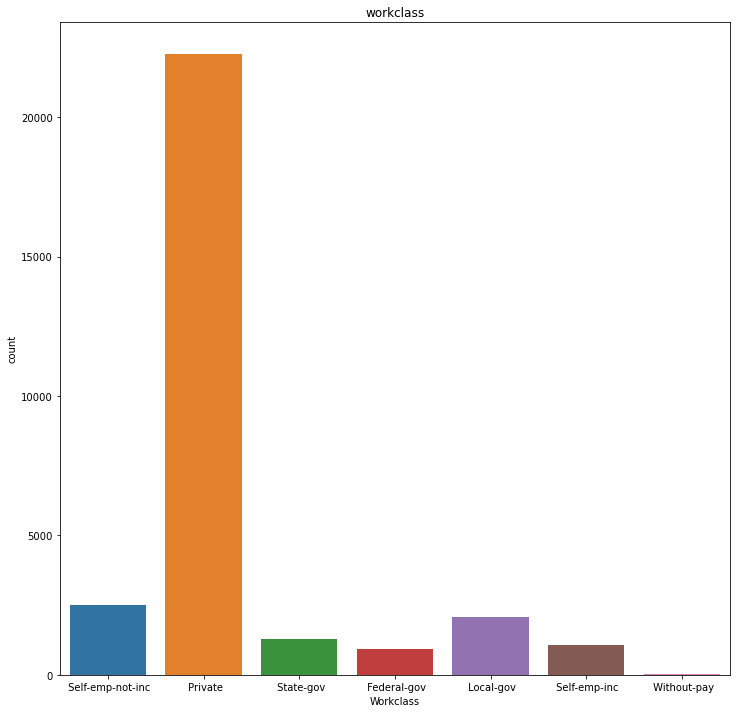

In [24]:
plt.subplots(figsize=(12,12))
sns.countplot(df['Workclass'])
plt.title("workclass")

We can see that people working in private are more that 20000

Text(0.5, 1.0, 'relationship')

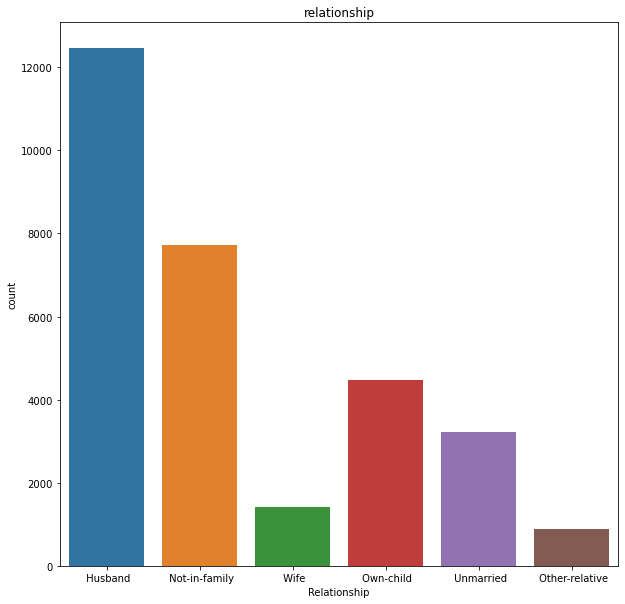

In [25]:
plt.subplots(figsize=(10,10))
sns.countplot(df['Relationship'])
plt.title("relationship")

Text(0.5, 1.0, 'education')

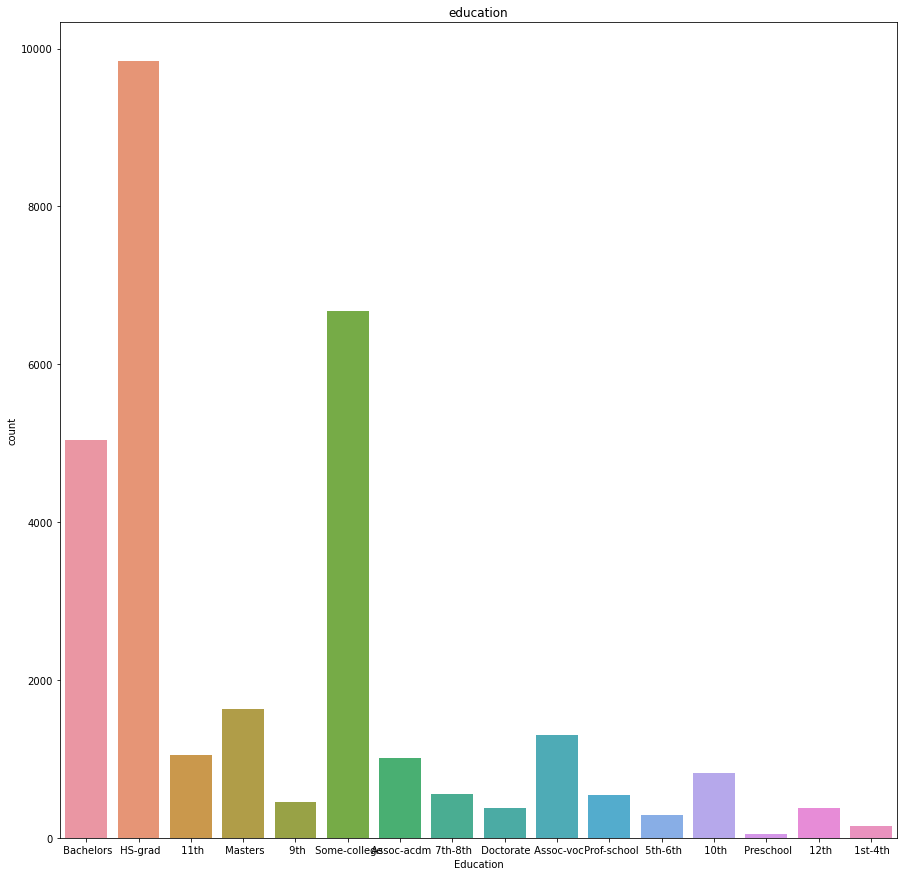

In [26]:
plt.subplots(figsize=(15,15))
sns.countplot(df['Education'])
plt.title("education")

Text(0.5, 1.0, 'occupation')

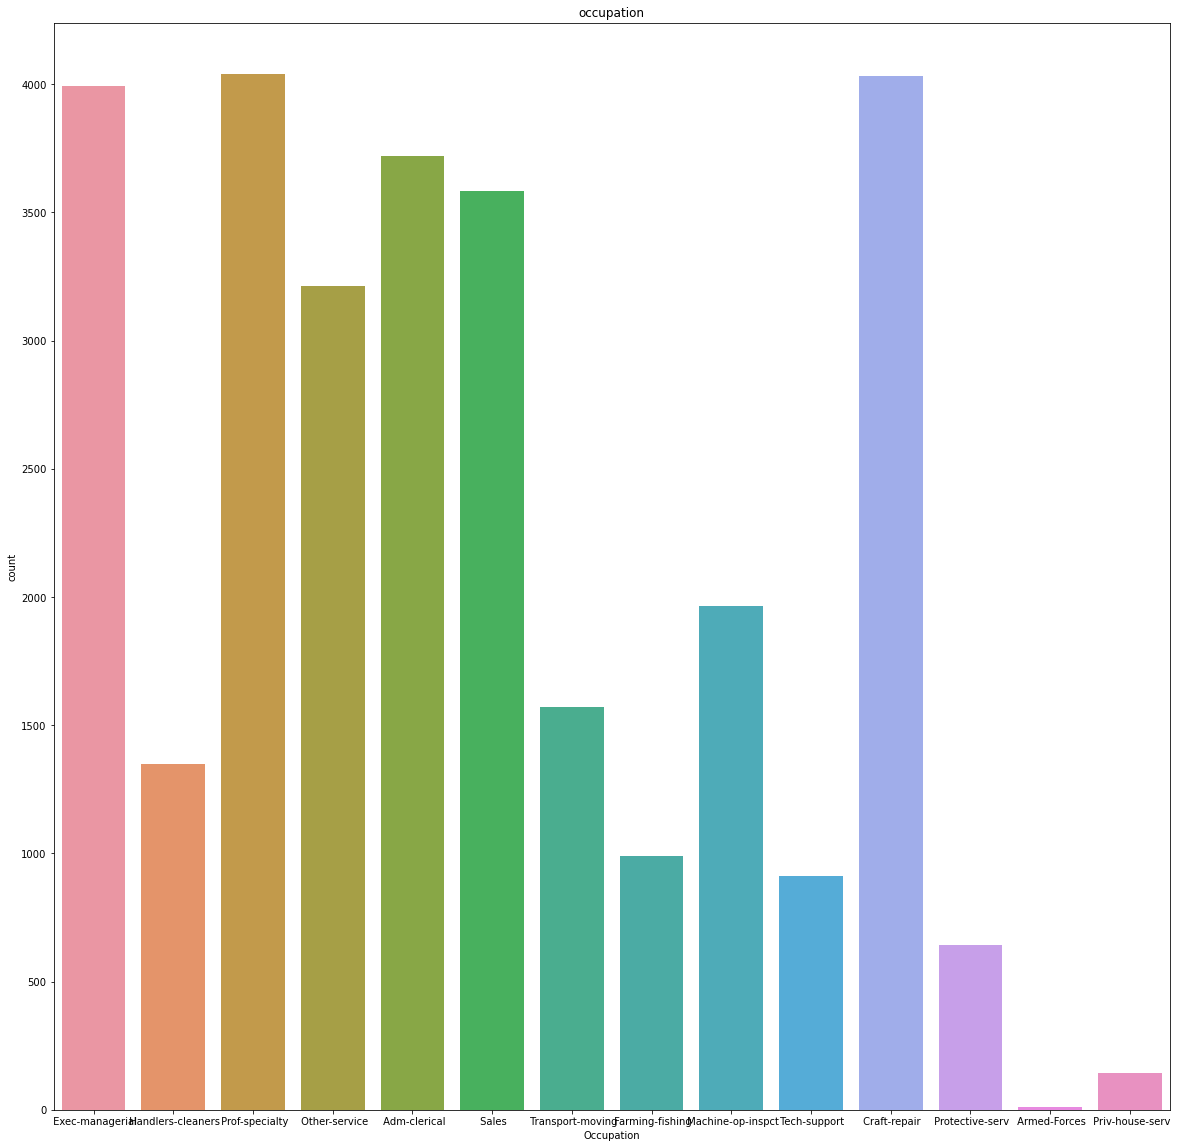

In [27]:
plt.subplots(figsize=(20,20))
sns.countplot(df['Occupation'])
plt.title("occupation")

Text(0.5, 1.0, 'Marital Status')

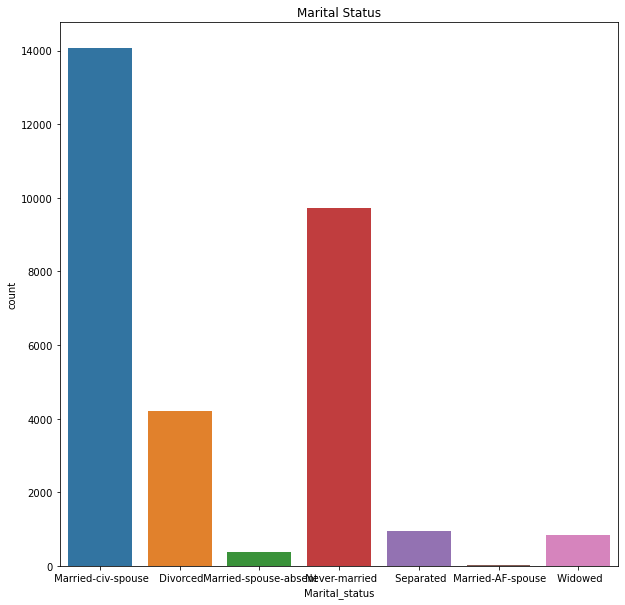

In [28]:
plt.subplots(figsize=(10,10))
sns.countplot(df['Marital_status'])
plt.title("Marital Status")

Text(0.5, 1.0, 'gender')

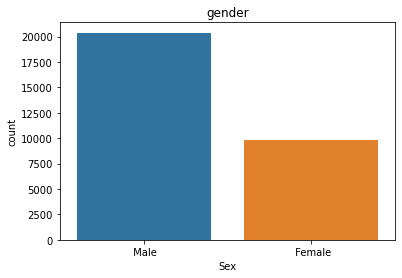

In [29]:
sns.countplot(df['Sex'])
plt.title("gender")

we can male are double to female

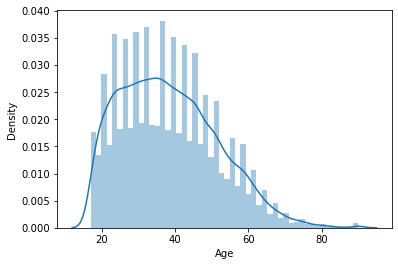

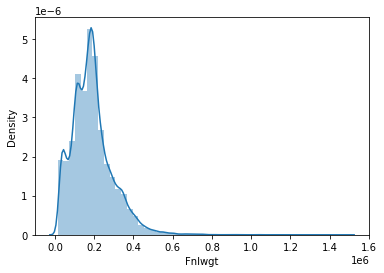

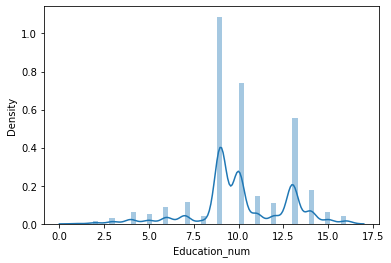

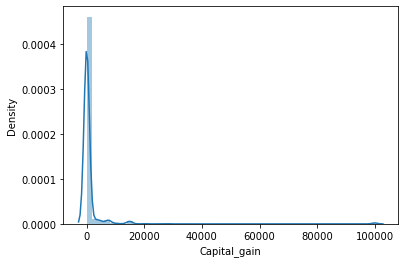

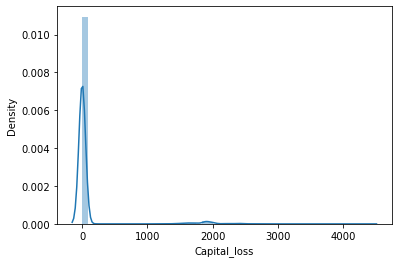

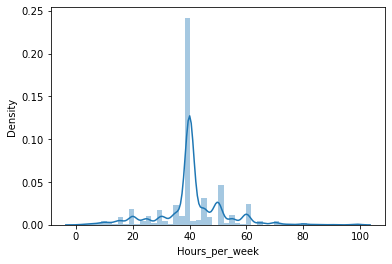

In [30]:
# checking wheather data is normally distributed or not
for i in df.describe().columns:
    sns.distplot(df[i])
    plt.show()

we can say that many outliers are present in Age,Fnlwgt,capital gain, capital_loss and hours_per_week

In [31]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,30161.000000,3.016100e+04,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.437883,1.897976e+05,10.121216,1091.971984,88.375419,40.931269
std,13.134882,1.056527e+05,2.549983,7406.466659,404.304753,11.980182
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176280e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784290e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.376300e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Age                  AxesSubplot(0.125,0.657941;0.0945122x0.222059)
Fnlwgt            AxesSubplot(0.238415,0.657941;0.0945122x0.222059)
Education_num     AxesSubplot(0.351829,0.657941;0.0945122x0.222059)
Capital_gain      AxesSubplot(0.465244,0.657941;0.0945122x0.222059)
Capital_loss      AxesSubplot(0.578659,0.657941;0.0945122x0.222059)
Hours_per_week    AxesSubplot(0.692073,0.657941;0.0945122x0.222059)
dtype: object

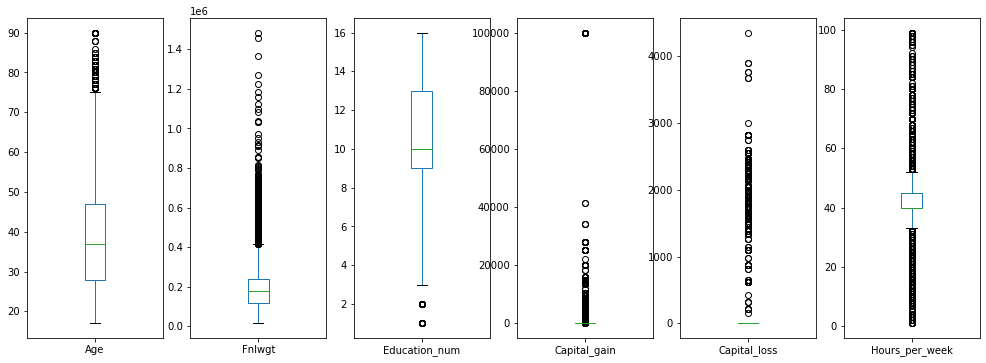

In [32]:
df.plot(kind='box',subplots=True,layout=(3,7),figsize=(20,20))

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Fnlwgt'}>],
       [<AxesSubplot:title={'center':'Education_num'}>,
        <AxesSubplot:title={'center':'Capital_gain'}>],
       [<AxesSubplot:title={'center':'Capital_loss'}>,
        <AxesSubplot:title={'center':'Hours_per_week'}>]], dtype=object)

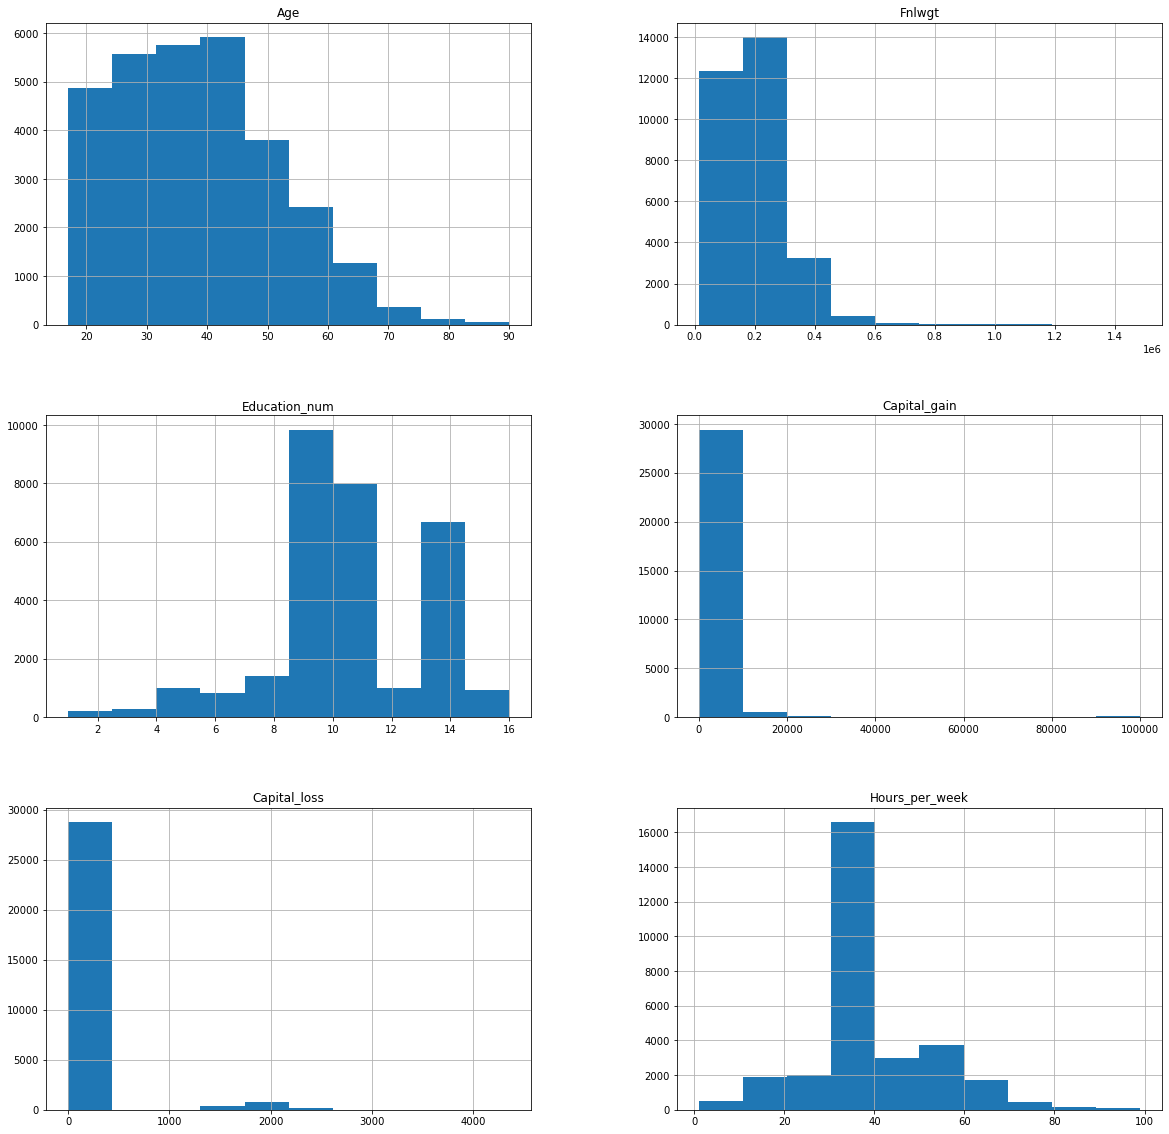

In [33]:
df.hist(figsize=(20,20))

<AxesSubplot:xlabel='Sex', ylabel='count'>

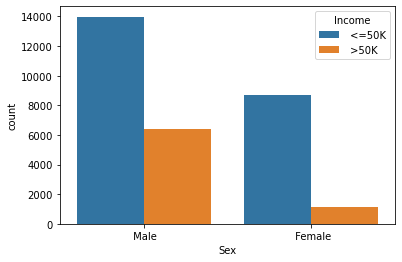

In [35]:
sns.countplot(x="Sex",hue="Income",data=df)

<AxesSubplot:xlabel='Occupation', ylabel='count'>

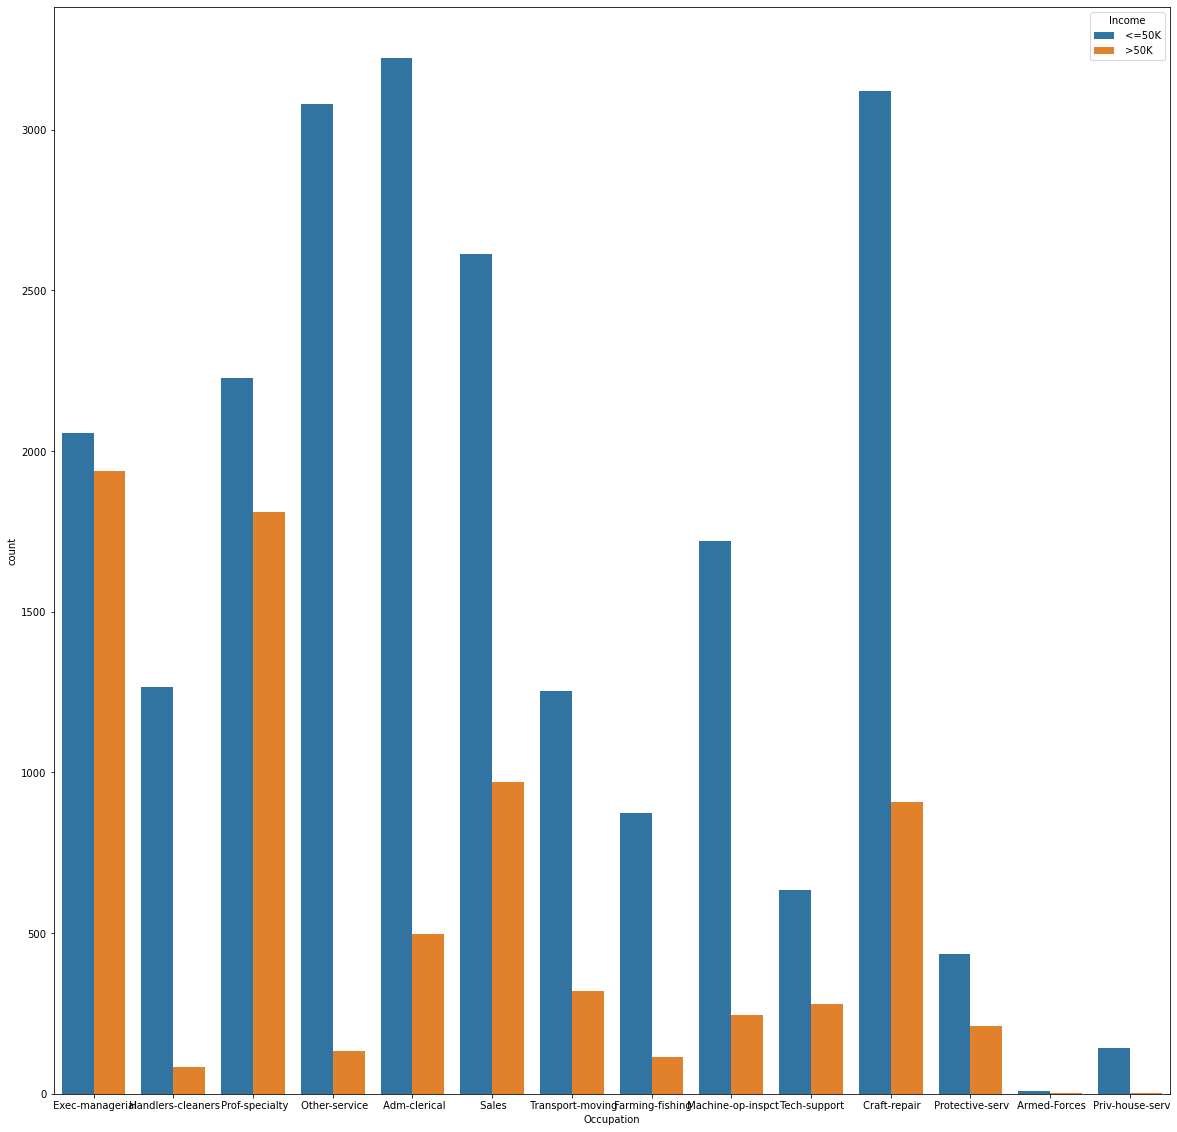

In [36]:
plt.subplots(figsize=(20,20))
sns.countplot(x="Occupation",hue="Income",data=df)

<AxesSubplot:xlabel='Race', ylabel='count'>

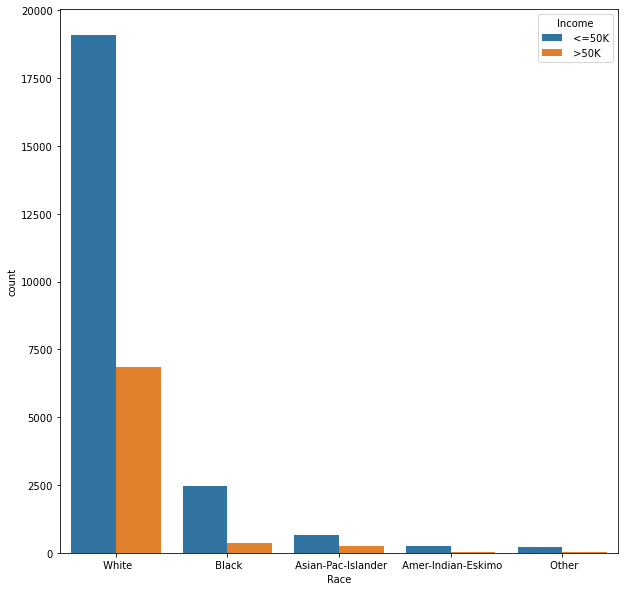

In [38]:
plt.subplots(figsize=(10,10))
sns.countplot(x="Race",hue="Income",data=df)

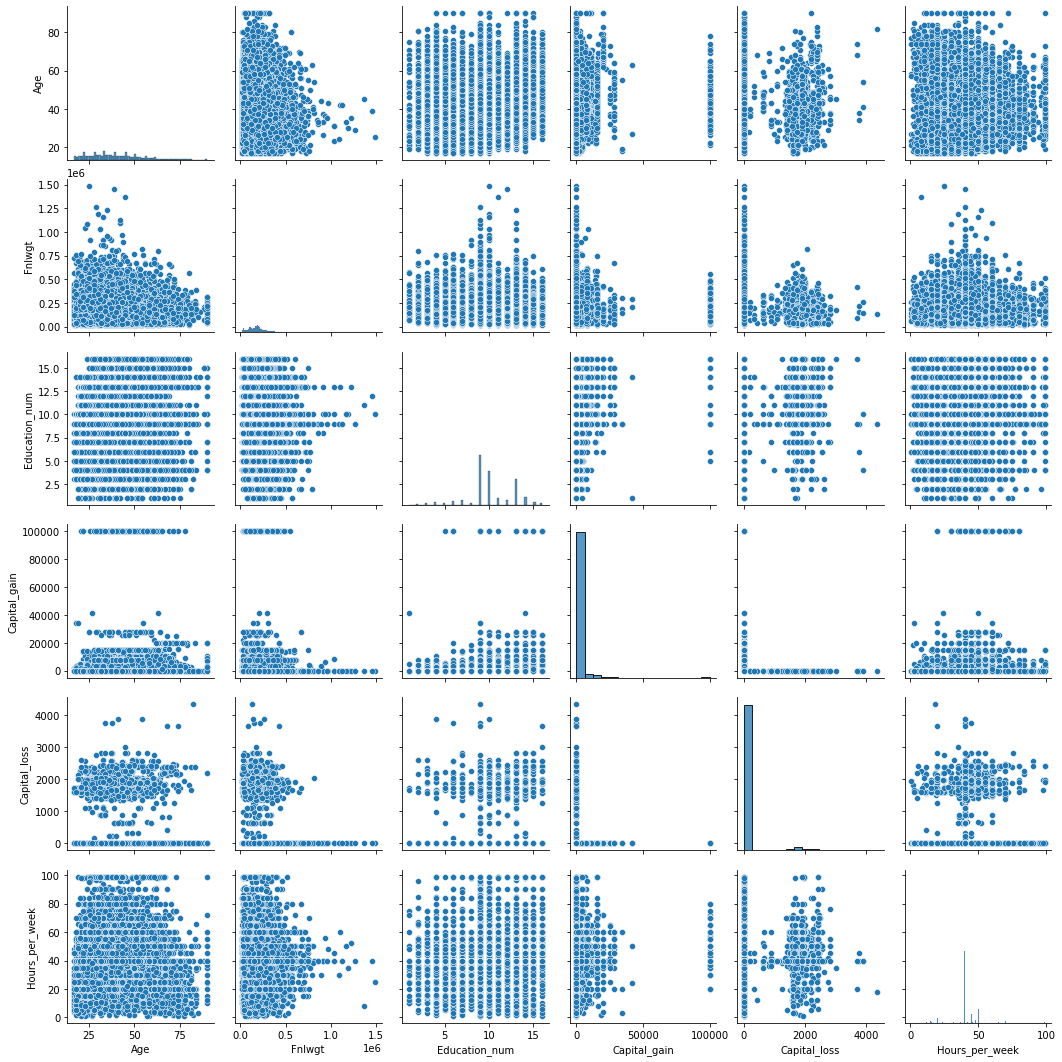

In [39]:
sns.pairplot(df)

# Label encoding 

In [40]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
for i in df.columns:
    if df[i].dtypes =='object':
        df[i]=le.fit_transform(df[i])

In [41]:
le=LabelEncoder()
lst=["Income"]
for val in lst:
    df[val]=le.fit_transform(df[val].astype(str))

### Statistical Analysis

In [42]:
df.describe()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,30161.000000,30161.000000,3.016100e+04,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.437883,2.199231,1.897976e+05,10.333809,10.121216,2.580087,5.960048,1.418355,3.678592,0.675674,1091.971984,88.375419,40.931269,36.382514,0.248931
std,13.134882,0.953804,1.056527e+05,3.812347,2.549983,1.498018,4.029487,1.601363,0.834721,0.468130,7406.466659,404.304753,11.980182,6.105467,0.432401
min,17.000000,0.000000,1.376900e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,2.000000,1.176280e+05,9.000000,9.000000,2.000000,2.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,38.000000,0.000000
50%,37.000000,2.000000,1.784290e+05,11.000000,10.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,38.000000,0.000000
75%,47.000000,2.000000,2.376300e+05,12.000000,13.000000,4.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,38.000000,0.000000
max,90.000000,6.000000,1.484705e+06,15.000000,16.000000,6.000000,13.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,40.000000,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

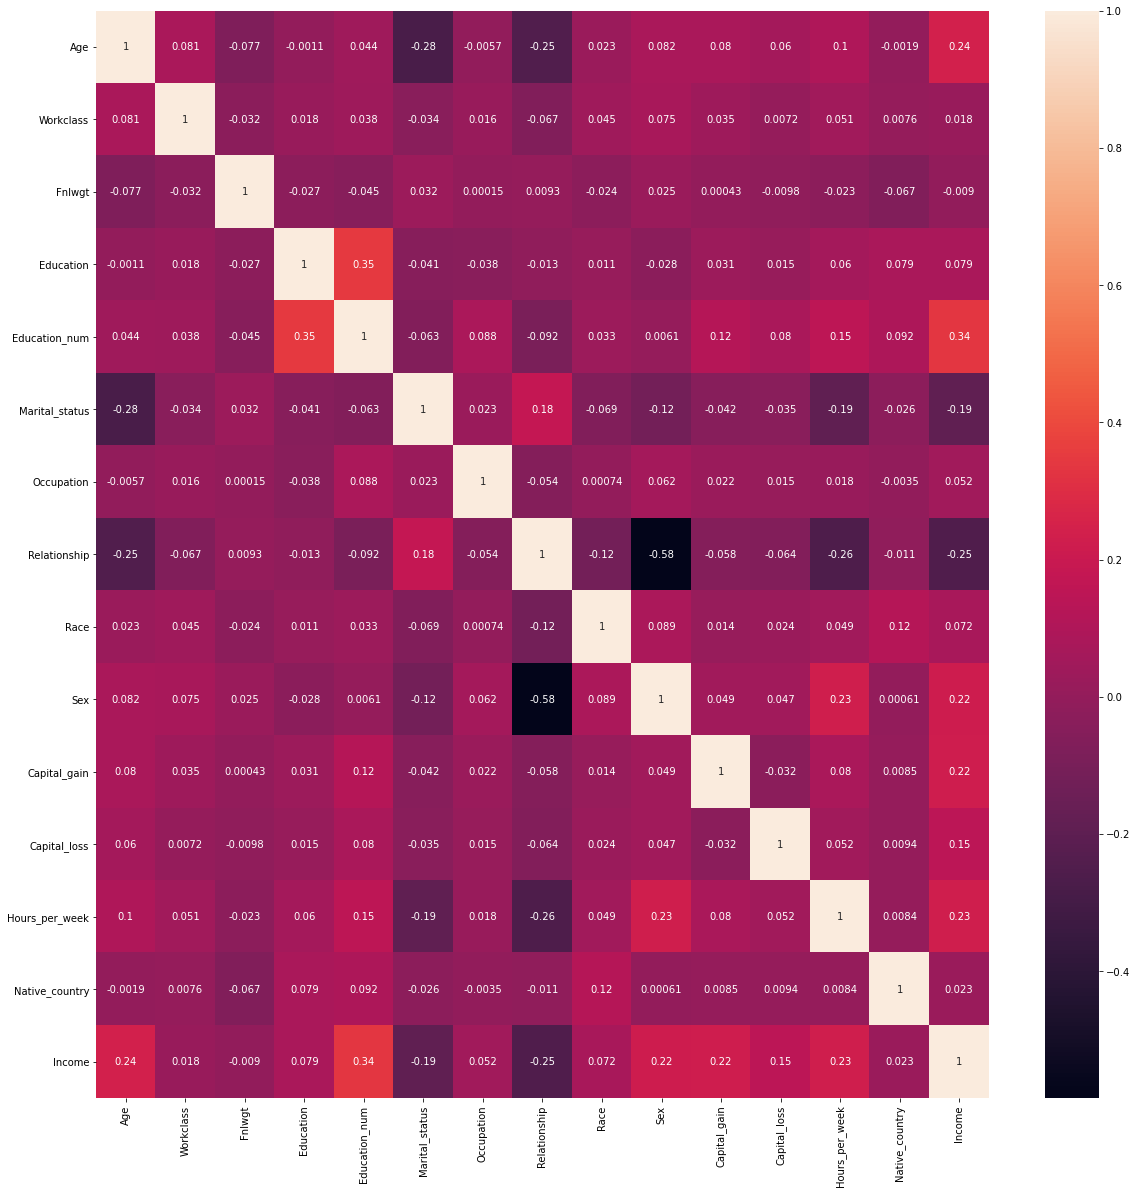

In [43]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)
plt.show

we can see that Income is Negatively co-related with fnlwgt, marital_status and relationship

In [44]:
df.corr()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.080548,-0.076511,-0.001111,0.043525,-0.276378,-0.005680,-0.246456,0.023373,0.081992,0.080154,0.060166,0.101599,-0.001905,0.242000
Workclass,0.080548,1.000000,-0.032395,0.017892,0.037729,-0.034338,0.015719,-0.067401,0.044700,0.074917,0.035340,0.007226,0.050738,0.007644,0.018103
Fnlwgt,-0.076511,-0.032395,1.000000,-0.027115,-0.044954,0.032197,0.000152,0.009289,-0.023882,0.025387,0.000427,-0.009757,-0.022889,-0.066709,-0.008978
Education,-0.001111,0.017892,-0.027115,1.000000,0.345431,-0.040654,-0.038231,-0.012720,0.011158,-0.027880,0.030577,0.015025,0.059887,0.078794,0.078981
Education_num,0.043525,0.037729,-0.044954,0.345431,1.000000,-0.063457,0.087778,-0.091928,0.032791,0.006131,0.124413,0.079656,0.152528,0.091547,0.335317
Marital_status,-0.276378,-0.034338,0.032197,-0.040654,-0.063457,1.000000,0.022702,0.177975,-0.068641,-0.119837,-0.042424,-0.035197,-0.189004,-0.025911,-0.193504
Occupation,-0.005680,0.015719,0.000152,-0.038231,0.087778,0.022702,1.000000,-0.053742,0.000736,0.062350,0.022170,0.014597,0.018362,-0.003470,0.051551
Relationship,-0.246456,-0.067401,0.009289,-0.012720,-0.091928,0.177975,-0.053742,1.000000,-0.117140,-0.584876,-0.058258,-0.063569,-0.257851,-0.010806,-0.251009
Race,0.023373,0.044700,-0.023882,0.011158,0.032791,-0.068641,0.000736,-0.117140,1.000000,0.089178,0.014351,0.023520,0.048533,0.124511,0.071666
Sex,0.081992,0.074917,0.025387,-0.027880,0.006131,-0.119837,0.062350,-0.584876,0.089178,1.000000,0.048811,0.047017,0.231272,0.000612,0.216715


### Removing Outliers

In [45]:
df.skew()

Age                0.530223
Workclass          1.154786
Fnlwgt             1.459212
Education         -0.944971
Education_num     -0.305328
Marital_status    -0.009387
Occupation         0.110420
Relationship       0.820275
Race              -2.506976
Sex               -0.750584
Capital_gain      11.902511
Capital_loss       4.526294
Hours_per_week     0.330856
Native_country    -4.178826
Income             1.161357
dtype: float64

In [46]:
from scipy.stats import zscore
z=np.abs(zscore(df))
df=df[(z<3).all(axis=1)]

In [47]:
df.skew()

Age                0.443409
Workclass          1.183942
Fnlwgt             0.627870
Education         -0.965906
Education_num     -0.135184
Marital_status    -0.039587
Occupation         0.122604
Relationship       0.788039
Race              -2.641835
Sex               -0.719849
Capital_gain       4.844071
Capital_loss      28.905177
Hours_per_week    -0.285632
Native_country    -5.337123
Income             1.269653
dtype: float64

# Splitting data in dependent and independent 

In [48]:
x=df.drop('Income',axis=1)
y=df['Income']

In [49]:
x.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,50,4,83311,9,13,2,3,0,4,1,0,0,13,38
1,38,2,215646,11,9,0,5,1,4,1,0,0,40,38
2,53,2,234721,1,7,2,5,0,2,1,0,0,40,38
4,37,2,284582,12,14,2,3,5,4,0,0,0,40,38
5,49,2,160187,6,5,3,7,1,2,0,0,0,16,22


In [50]:
y.head()

0    0
1    0
2    0
4    0
5    0
Name: Income, dtype: int32

In [52]:
x.shape

(25759, 14)

In [53]:
y.shape

(25759,)

In [54]:
y=y.values.reshape(-1,1)

In [56]:
y.shape

(25759, 1)

In [58]:
# Converting particular cloumns in between 0 to 1 by using MinMax scaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
columns_to_scale=['Age','Education_num','Capital_gain','Capital_loss','Hours_per_week']
x[columns_to_scale]=scaler.fit_transform(x[columns_to_scale])

In [59]:
#Reducing skewness of the data set
for i in x.columns:
    if x.skew().loc[i]>0.55:
        x[i]=np.log1p(x[i])

In [60]:
x.skew()

Age                0.443409
Workclass         -0.882356
Fnlwgt            -0.953423
Education         -0.965906
Education_num     -0.135184
Marital_status    -0.039587
Occupation         0.122604
Relationship       0.289504
Race              -2.641835
Sex               -0.719849
Capital_gain       4.446586
Capital_loss      27.660124
Hours_per_week    -0.285632
Native_country    -5.337123
dtype: float64

### importing more libraries 

In [61]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,roc_auc_score,roc_curve,auc
from sklearn.model_selection import GridSearchCV

### finding best random state 

In [62]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu,"on random state",maxRS)

Best accuracy is  0.8377329192546584 on random state 164


In [63]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=164,test_size=0.25)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(19319, 14)
(19319, 1)
(6440, 14)
(6440, 1)


### Using GridSearchCV to find best parameters

In [64]:
LR=LogisticRegression()
parameters={'penalty':['l1','l2']}
gd=GridSearchCV(LR,parameters)
gd.fit(x_train,y_train)
print(gd.best_params_)
print("\n")


knn=KNeighborsClassifier()
parameters={'n_neighbors':range(1,10)}
gd=GridSearchCV(knn,parameters)
gd.fit(x_train,y_train)
print(gd.best_params_)
print("\n")



svc=SVC()
parameters={'kernel':('linear', 'poly', 'rbf'),'C':[1,10]}
gd=GridSearchCV(svc,parameters)
gd.fit(x_train,y_train)
print(gd.best_params_)
print("\n")



dtc=DecisionTreeClassifier()
parameters={'criterion':('gini','entropy')}
gd=GridSearchCV(dtc,parameters)
gd.fit(x_train,y_train)
print(gd.best_params_)
print("\n")



gbc=GradientBoostingClassifier()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,50,100,120,150]}
gd=GridSearchCV(gbc,parameters)
gd.fit(x_train,y_train)
print(gd.best_params_)
print("\n")



rfc=RandomForestClassifier()
parameters={"n_estimators":[10,50,100,120,150],"max_features": ["auto", "sqrt", "log2"]}
gd=GridSearchCV(gbc,parameters)
gd.fit(x_train,y_train)
print(gd.best_params_)
print("\n")


ada=AdaBoostClassifier()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,50,100,120,150,200]}
gd=GridSearchCV(ada,parameters)
gd.fit(x_train,y_train)
print(gd.best_params_)

{'penalty': 'l2'}


{'n_neighbors': 9}


{'C': 10, 'kernel': 'linear'}


{'criterion': 'entropy'}


{'learning_rate': 0.1, 'n_estimators': 150}


{'max_features': 'auto', 'n_estimators': 150}


{'learning_rate': 1, 'n_estimators': 200}




The model score for LogisticRegression() are:
[0 0 0 ... 1 0 0]
Accuracy score = 0.8324534161490683
The cv score is 0.8257307798280742

[[4716  796]
 [ 283  645]]

              precision    recall  f1-score   support

           0       0.94      0.86      0.90      5512
           1       0.45      0.70      0.54       928

    accuracy                           0.83      6440
   macro avg       0.70      0.78      0.72      6440
weighted avg       0.87      0.83      0.85      6440



roc_auc_score 0.6954972535103828


AxesSubplot(0.125,0.808774;0.62x0.0712264)


The model score for KNeighborsClassifier(n_neighbors=9) are:
[0 0 0 ... 1 0 0]
Accuracy score = 0.823136645962733
The cv score is 0.8260802642193339

[[4545  685]
 [ 454  756]]

              precision    recall  f1-score   support

           0       0.91      0.87      0.89      5230
           1       0.52      0.62      0.57      1210

    accuracy                           0.82      6440
   macro avg       0.72      

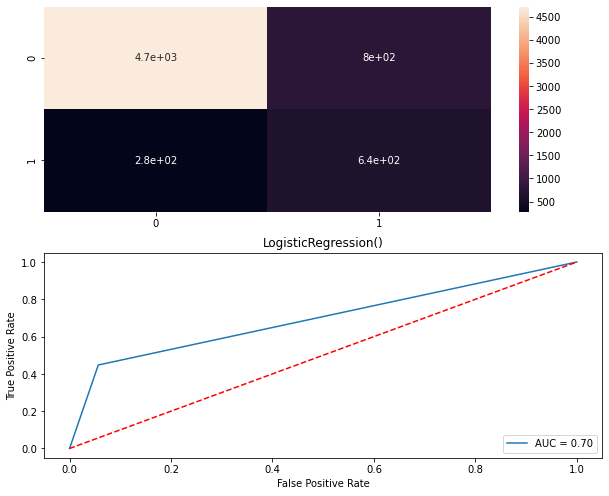

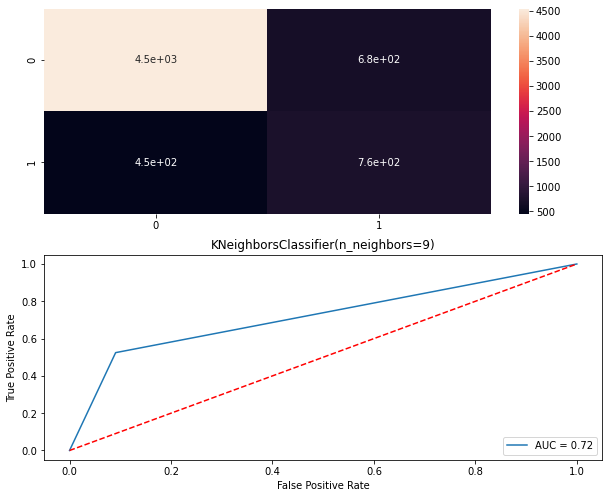

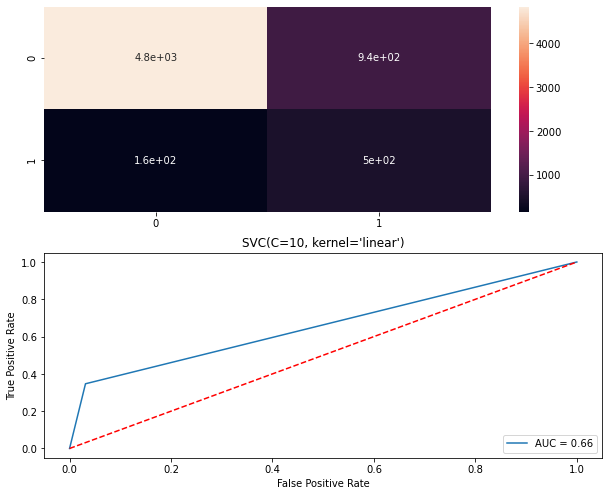

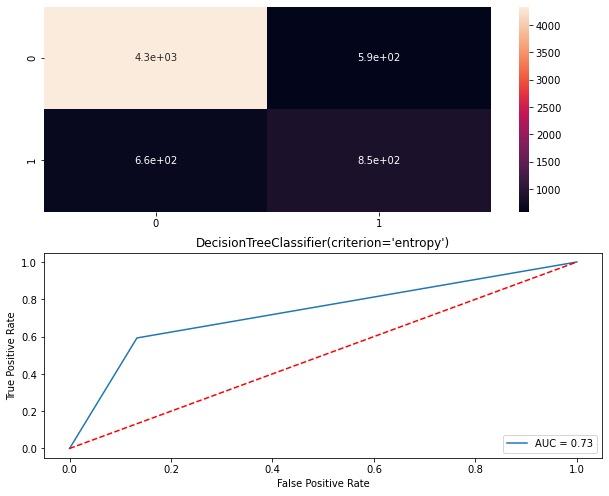

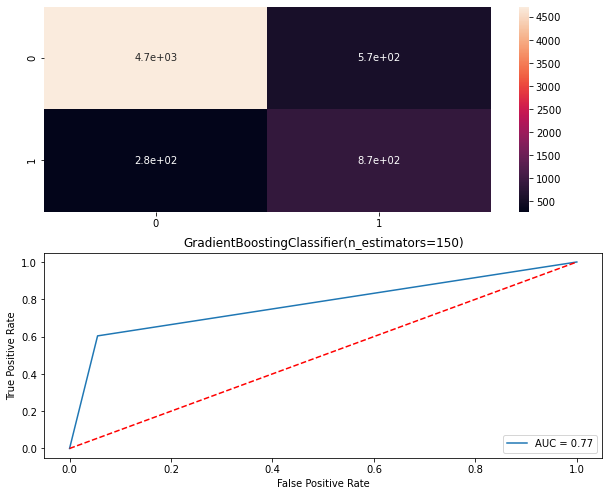

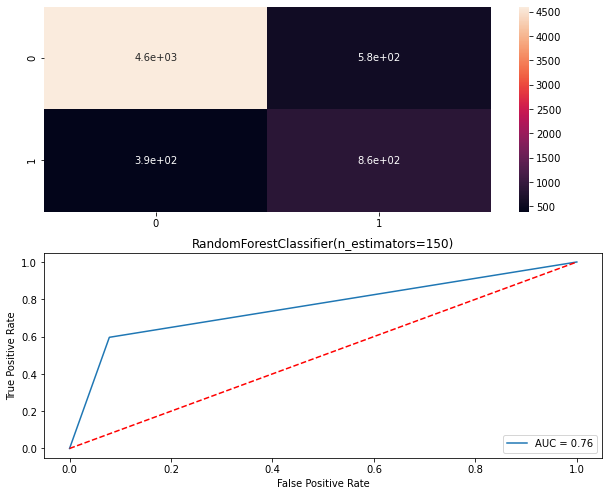

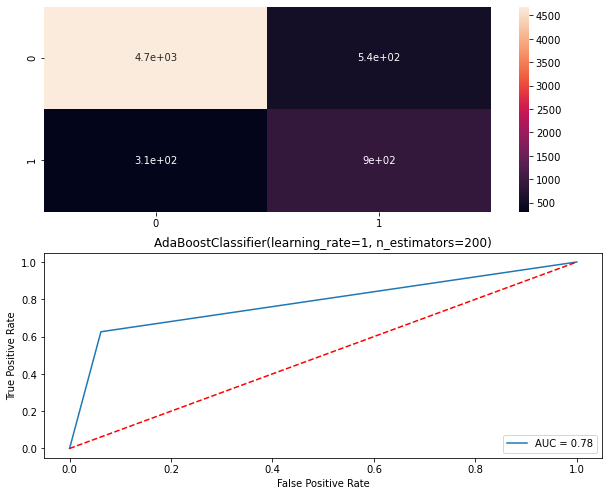

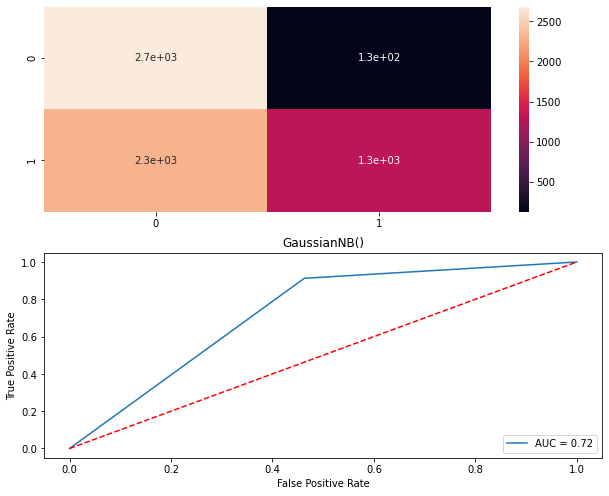

In [65]:
model=[]
score=[]
cvs=[]
rocscore=[]

for i in [LogisticRegression(penalty='l2'),KNeighborsClassifier(n_neighbors=9),SVC(C=10,kernel='linear'),
          DecisionTreeClassifier(criterion='entropy'),GradientBoostingClassifier(learning_rate=0.1,n_estimators=150),
          RandomForestClassifier(max_features='auto',n_estimators=150),
          AdaBoostClassifier(learning_rate =1, n_estimators = 200),GaussianNB()]:
    j=i
    model.append(i)
    print("\n")
    print("The model score for",i,"are:")
    j.fit(x_train,y_train)
    j.score(x_train,y_train)
    predict=j.predict(x_test)
    print(predict)
    AS=accuracy_score(predict,y_test)
    print("Accuracy score =", AS)
    score.append(AS)
    cv_score=cross_val_score(j,x,y,cv=5,scoring="accuracy").mean()
    print("The cv score is",cv_score)
    cvs.append(cv_score)
    print("")
    cm=confusion_matrix(predict,y_test)
    print(cm)
    print("")
    print(classification_report(predict,y_test))
    print("\n")
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,predict)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print('roc_auc_score',roc_auc)
    rocscore.append(roc_auc)
    print("\n")
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
   
    plt.title(i)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC = %0.2f'%roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')

In [66]:
output=pd.DataFrame({'Model':['LogisticRegression','KNeighborsClassifier','SVC','GaussianNB','DecisionTreeClassifier','GradientBoostingClassifier','RandomForestClassifier','AdaBoostClassifier'],'Accuracy_Score':score,'Cross_val_score':cvs,'Roc_auc_curve':rocscore})
output

,Model,Accuracy_Score,Cross_val_score,Roc_auc_curve
0,LogisticRegression,0.832453,0.825731,0.695497
1,KNeighborsClassifier,0.823137,0.826080,0.716909
2,SVC,0.829503,0.818355,0.657787
3,GaussianNB,0.805745,0.803020,0.729909
4,DecisionTreeClassifier,0.868478,0.862456,0.774268
5,GradientBoostingClassifier,0.848758,0.846694,0.758849
6,RandomForestClassifier,0.868323,0.862223,0.782071
7,AdaBoostClassifier,0.621273,0.776816,0.724934


we can see Random Forest classifier

In [68]:
rfc=RandomForestClassifier(max_features='auto',n_estimators=150)
rfc.fit(x_train,y_train)
predict=rfc.predict(x_test)
AS=accuracy_score(predict,y_test)
print("Accuracy Score =",AS)
cv_score=cross_val_score(j,x,y,cv=5,scoring="accuracy").mean()
print("The CV Score =",cv_score)
false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,predict)
roc_auc=auc(false_positive_rate,true_positive_rate)
print('roc_auc_score',roc_auc)

Accuracy Score = 0.8503105590062112
The CV Score = 0.7768164627021708
roc_auc_score 0.7596023021398173


### Saving the Model

In [69]:
import joblib
joblib.dump(rfc,"Census_Income_Data.pkl")

['Census_Income_Data.pkl']